In [16]:
import pandas as pd
import os # use commandline  
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
uploaded = files.upload()
bank_clusters = pd.read_csv(io.BytesIO(uploaded['bank_cluster.csv']))

Saving bank_cluster.csv to bank_cluster (1).csv


In [17]:
bank_clusters

,age,sex,region,income,married,children,car,save_act,current_act,mortgage
0,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO
1,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES
2,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO
3,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO
4,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO
...,...,...,...,...,...,...,...,...,...,...
595,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES
596,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO
597,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO
598,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES


Text(0, 0.5, 'income')

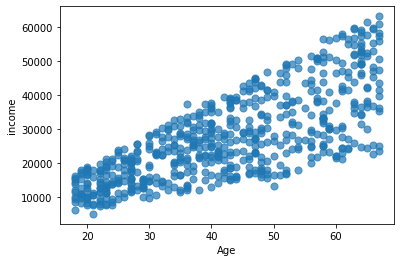

In [18]:
points = bank_clusters.iloc[:,:].values
x = points[:, 0]
y = points[:, 3]
plt.scatter(x, y, s=50, alpha=0.7) #s = ขนาดของจุด, alpha =ระดับความคมชัดของจุด
plt.xlabel('Age')
plt.ylabel('income')

In [19]:
from sklearn.preprocessing import LabelEncoder
df = bank_clusters.copy()
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
df['region'] = encoder.fit_transform(df['region'])
df['married'] = encoder.fit_transform(df['married'])
df['car'] = encoder.fit_transform(df['car'])
df['save_act'] = encoder.fit_transform(df['save_act'])
df['current_act'] = encoder.fit_transform(df['current_act'])
df['mortgage'] = encoder.fit_transform(df['mortgage'])
df.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage
0,48,0,0,17546.0,0,1,0,0,0,0
1,40,1,3,30085.1,1,3,1,0,1,1
2,51,0,0,16575.4,1,0,1,1,1,0
3,23,0,3,20375.4,1,3,0,0,1,0
4,57,0,1,50576.3,1,0,0,1,0,0


**Elblow**


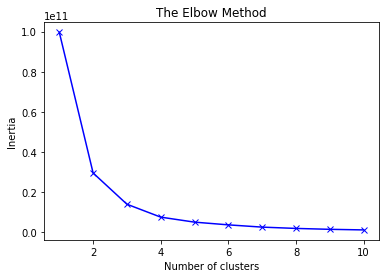

In [20]:
points = df.iloc[:, :].values
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  max_iter = 300, random_state = 0)
    kmeans.fit(points)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia,'bx-') # bx- สัญลักษณ์ของกราฟ ในแต่ละคลัสเตอร์
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(points)
df['Cluster'] = kmeans.labels_
df

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,Cluster
0,48,0,0,17546.00,0,1,0,0,0,0,2
1,40,1,3,30085.10,1,3,1,0,1,1,0
2,51,0,0,16575.40,1,0,1,1,1,0,2
3,23,0,3,20375.40,1,3,0,0,1,0,2
4,57,0,1,50576.30,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
595,61,0,0,47025.00,0,2,1,1,1,1,1
596,30,0,0,9672.25,1,0,1,1,1,0,2
597,31,0,3,15976.30,1,0,1,1,0,0,2
598,29,1,0,14711.80,1,0,0,1,0,1,2


In [22]:
kmeans.labels_

array([2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 2,
       0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0,
       2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1,
       2, 0, 1, 0, 2, 0, 1, 1, 0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 1,
       0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2, 1, 2, 0, 2, 2, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1,
       0, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1,
       2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 1, 0, 2, 2,
       0, 0, 2, 0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 2, 2,

**ค่า centroid ของแต่ละ clusters**

In [23]:
centers = kmeans.cluster_centers_ 
centers

array([[4.67873303e+01, 4.84162896e-01, 1.29864253e+00, 3.07320385e+04,
        6.24434389e-01, 1.00000000e+00, 5.61085973e-01, 6.42533937e-01,
        7.46606335e-01, 3.66515837e-01],
       [5.90566038e+01, 5.00000000e-01, 1.13207547e+00, 4.92589066e+04,
        6.79245283e-01, 1.07547170e+00, 5.09433962e-01, 1.00000000e+00,
        8.01886792e-01, 3.20754717e-01],
       [3.23699634e+01, 5.12820513e-01, 1.21611722e+00, 1.64878906e+04,
        6.81318681e-01, 9.96336996e-01, 4.32234432e-01, 6.08058608e-01,
        7.50915751e-01, 3.44322344e-01]])

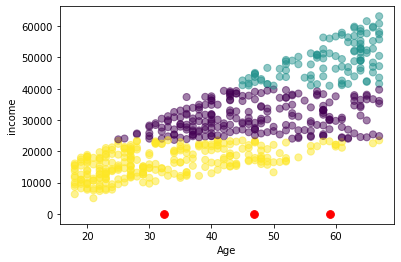

In [24]:
plt.scatter(x, y, c=kmeans.labels_, s=50, alpha=0.5, cmap='viridis') #ลองปรับค่า cmap = rainbow
plt.xlabel('Age')
plt.ylabel('income')

newcenters = centers
# newcenters.round(0).astype('int')

plt.scatter(newcenters[:, 0], newcenters[:, 1], c='red', s=60) #0 คือ แกน x ,1 คือแกน y

**Inertia (SSE)**

In [25]:
kmeans.inertia_

14071731814.388165

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(df)
pca_2d = pca.transform(df)
newdf = pd.DataFrame(pca_2d);
newdf['Cluster'] = kmeans.labels_
newdf

,0,1,Cluster
0,-9978.022999,13.999353,2
1,2561.065899,-4.539132,0
2,-10948.620118,17.814431,2
3,-7148.645040,-13.378030,2
4,23052.272894,-4.801082,1
...,...,...,...
595,19500.977532,2.180790,1
596,-17851.785344,2.629154,2
597,-11547.736742,-1.668133,2
598,-12812.237981,-2.617800,2


In [27]:
df.to_csv('bank_cluster.csv',index=False)

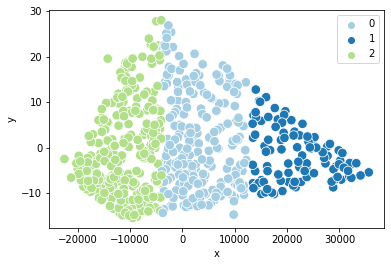

In [28]:
sns.scatterplot(x=newdf[0], y=newdf[1], hue="Cluster", data=newdf, palette='Paired', s=90, alpha = 1.0,cmap = 'viridis');
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best');

In [29]:
centers

array([[4.67873303e+01, 4.84162896e-01, 1.29864253e+00, 3.07320385e+04,
        6.24434389e-01, 1.00000000e+00, 5.61085973e-01, 6.42533937e-01,
        7.46606335e-01, 3.66515837e-01],
       [5.90566038e+01, 5.00000000e-01, 1.13207547e+00, 4.92589066e+04,
        6.79245283e-01, 1.07547170e+00, 5.09433962e-01, 1.00000000e+00,
        8.01886792e-01, 3.20754717e-01],
       [3.23699634e+01, 5.12820513e-01, 1.21611722e+00, 1.64878906e+04,
        6.81318681e-01, 9.96336996e-01, 4.32234432e-01, 6.08058608e-01,
        7.50915751e-01, 3.44322344e-01]])

In [30]:
newcenters = pd.DataFrame(centers)
newcenters.round(0).astype('int') #ปัดเศษขึ้นลงตามค่าที่ใกล้เคียง

,0,1,2,3,4,5,6,7,8,9
0,47,0,1,30732,1,1,1,1,1,0
1,59,0,1,49259,1,1,1,1,1,0
2,32,1,1,16488,1,1,0,1,1,0


**อธิบาย**
กลุ่มเป้าหมายที่ 0 คือกลุ่มของผู้สูงอายุ ที่มีรายได้กำลังดี ดังนั้นกลุ่มนี้จึงเป็นกลุ่มเป้าหมาย เพื่อ bank จะได้มีการโฆษณามากขึ้น
<Br>
กลุ่มเป้าหมายที่ 1 คือกลุ่มเป้าหมายที่มีอายุมากขึ้นและพร้อมที่จะเกษียณการทำงาน
<Br>
กลุ่มเป้าหมายที่ 2 คือกลุ่มเป้าหมายที่มีอายุเฉลี่ยพึ่งเริ่มทำงานเก็บเงินได้อย่างจริงจัง และจีงมีเงินเดือนหรือรายได้ไม่มาก ดังนั้นช่วงนี้กลุ่มเป้าหมายที่ 2 จึงมีจำนวนเงินเก็บไม่มาก
<Br>
ทั้ง 3 กลุ่มเป้าหมาย อาศัยอยู่ในชนบทสะส่วนใหญ่

UNSEEN DATA

In [31]:
X=[
   [56,0 ,0,40000,1,1,1,0,1,0],
   [20,1 ,1 ,21000,1,2,1,1,0,0],
   [65,1 ,2 ,15000,1,3,0,1,1,0],
   [25,1 ,1 ,35200,1,0,1,0,0,0],
   [45,0 ,0 ,60040,1,1,0,1,1,0]
   ] 
C_clustered=kmeans.predict(X)
print(C_clustered)

[1 2 2 0 1]
